In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load model and data
lin_reg_mod = joblib.load("../models/laptop_price_model.pkl")
lin_reg_mod_features = joblib.load("../models/model_features.pkl")
X_train, X_test, y_train, y_test = joblib.load("../models/train_test_split.pkl")

In [3]:
# Align test set with expected features
X_train = X_train[lin_reg_mod_features]
X_test = X_test[lin_reg_mod_features]

In [4]:
# Predictions
y_train_pred = lin_reg_mod.predict(X_train)
y_test_pred = lin_reg_mod.predict(X_test)


In [5]:
# Print first 5 predictions to verify if the model is imported correctly
print(f'Predictions: {y_train_pred[:5]}')

Predictions: [ 197.97355346  625.69955959  652.68080325 1864.25712955 1611.80733617]


In [6]:
# Evaluate performance
def evaluate_model(y_train, y_train_pred, dataset_name="Dataset"):
    """
    This function calculates and prints evaluation metrics.
    """
    r2 = r2_score(y_train, y_train_pred) # R²
    mae_val = mean_absolute_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_train, y_train_pred)
    rmse_val = np.sqrt(mse_val)
    print(f"{dataset_name} Evaluation")
    print(f"R^2: {r2:.2f}")
    print(f"MAE: {mae_val:.2f}")
    print(f"RMSE: {rmse_val:.2f}")

In [7]:
# Calculate evaluation metrics for the training data
evaluate_model(y_train, y_train_pred, dataset_name="Training Data")

Training Data Evaluation
R^2: 0.85
MAE: 192.34
RMSE: 258.98


In [8]:
# calculate evaluation metrics for the test data
evaluate_model(y_test, y_test_pred, dataset_name="Test Data")

Test Data Evaluation
R^2: 0.85
MAE: 214.96
RMSE: 295.88


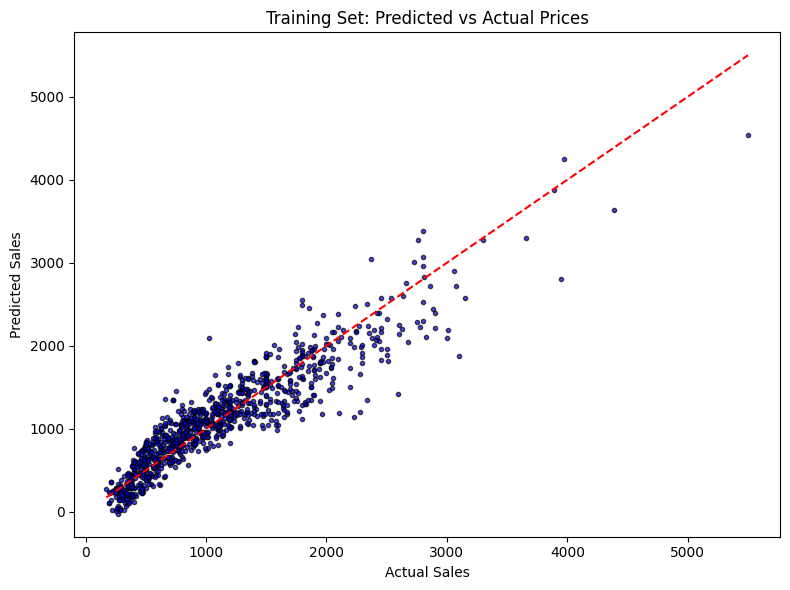

In [9]:
# Plot actual vs. predicted sales for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color="blue", edgecolor="k", alpha=0.7, s=9)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Training Set: Predicted vs Actual Prices")
plt.tight_layout()
plt.show()

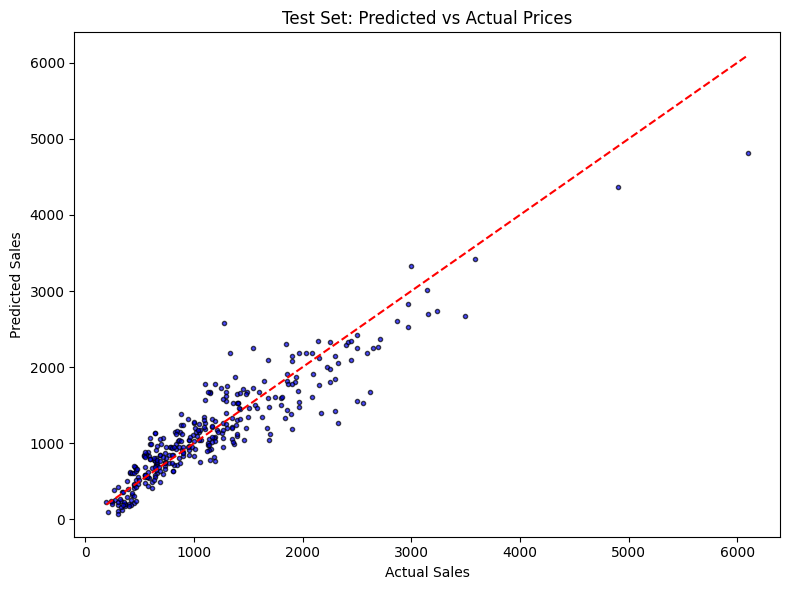

In [10]:
# Plot actual vs. predicted sales for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color="blue", edgecolor="k", alpha=0.7, s=9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Test Set: Predicted vs Actual Prices")
plt.tight_layout()
plt.show()

In [11]:
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

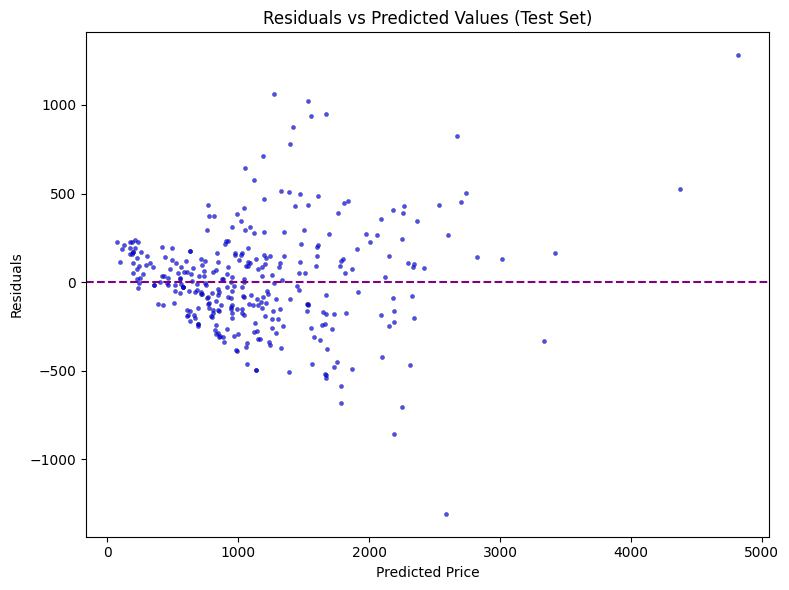

In [12]:
# Residual plot for test set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=test_residuals, color='blue', edgecolor='k', alpha=0.7, s=9)
plt.axhline(0, linestyle='--', color='purple')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.tight_layout()
plt.show()

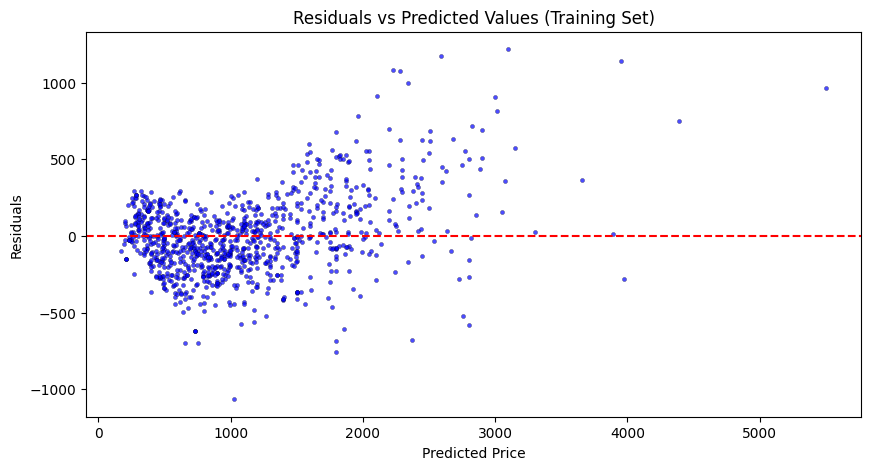

In [13]:
# Residual plot for training set
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_train, y=train_residuals, color='blue', edgecolor='k', alpha=0.7, s=9)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

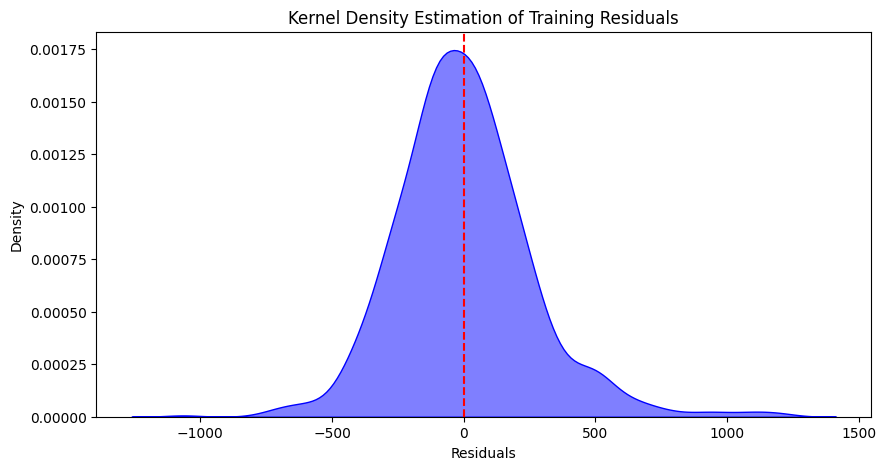

In [14]:
# Kernel density estimation (KDE) OF Training Residuals
plt.figure(figsize=(10,5))
sns.kdeplot(train_residuals, color='blue', fill=True, alpha=0.5)
plt.axvline(0, color='red', linestyle='--')
plt.title('Kernel Density Estimation of Training Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

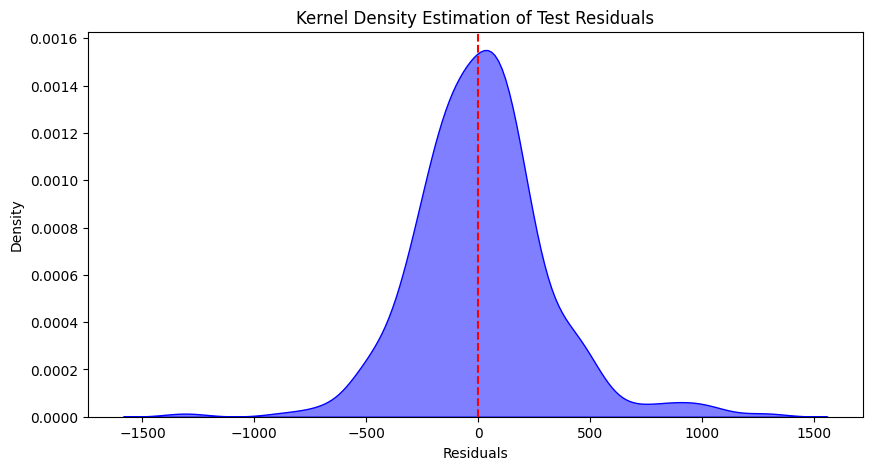

In [15]:
# Kernel density estimation (KDE) OF Test Residuals
plt.figure(figsize=(10,5))
sns.kdeplot(test_residuals, color='blue', fill=True, alpha=0.5)
plt.axvline(0, color='red', linestyle='--')
plt.title('Kernel Density Estimation of Test Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [16]:
#import SHAP library for model explainabilty
import shap

c:\Users\USER\Desktop\CPE221Lab\MINI_PROJECT GROUP_Y\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
# Create SHAP explainer using your trained model
explainer = shap.Explainer(lin_reg_mod, X_train)

# Compute SHAP values for the test set (X_test must be a DataFrame)
shap_values = explainer(X_test)

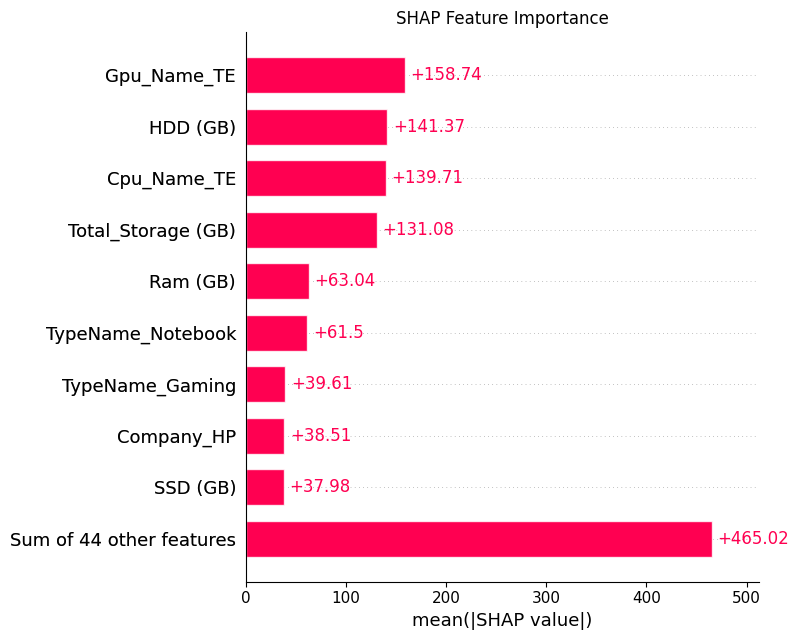

In [18]:
# Create a bar plot to show global feature importance based on average absolute SHAP values
shap.plots.bar(shap_values, show=False)
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.show()